In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

C:\Users\rhdut\anaconda3\envs\prophenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df=pd.read_csv("D:\\Personal Stuff\\Study Material\\Datasets\\Time Series Forecasting\\yahoo_stock.csv",index_col='Date',parse_dates=True)
df.head()
df.index.freq='D'
df.index


DatetimeIndex(['2015-11-23', '2015-11-24', '2015-11-25', '2015-11-26',
               '2015-11-27', '2015-11-28', '2015-11-29', '2015-11-30',
               '2015-12-01', '2015-12-02',
               ...
               '2020-11-11', '2020-11-12', '2020-11-13', '2020-11-14',
               '2020-11-15', '2020-11-16', '2020-11-17', '2020-11-18',
               '2020-11-19', '2020-11-20'],
              dtype='datetime64[ns]', name='Date', length=1825, freq='D')

In [3]:
df_close=df[['Close']]
df_close.head()


,Close
Date,
2015-11-23,2086.590088
2015-11-24,2089.139893
2015-11-25,2088.870117
2015-11-26,2088.870117
2015-11-27,2090.110107


In [4]:
df_close.reset_index(inplace=True)
df_close.head()

,Date,Close
0,2015-11-23,2086.590088
1,2015-11-24,2089.139893
2,2015-11-25,2088.870117
3,2015-11-26,2088.870117
4,2015-11-27,2090.110107


In [10]:
df_close.columns=['ds','y']
df_close.head()

,ds,y
0,2015-11-23,2086.590088
1,2015-11-24,2089.139893
2,2015-11-25,2088.870117
3,2015-11-26,2088.870117
4,2015-11-27,2090.110107


In [11]:
df_close['ds']=pd.to_datetime(df_close['ds'])

C:\Users\rhdut\AppData\Local\Temp\ipykernel_23820\1065785001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close['ds']=pd.to_datetime(df_close['ds'])


## Predictions

### Train/Test split

In [25]:
len(df_close)

1825

In [26]:
len(df_close)-60

1765

In [27]:
train=df_close.iloc[:1765]
test=df_close.iloc[1765:]

In [29]:
pred_model=Prophet()
pred_model.fit(train)
predictions=pred_model.make_future_dataframe(periods=60,freq='D')

21:10:28 - cmdstanpy - INFO - Chain [1] start processing
21:10:29 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
pred_y=pred_model.predict(predictions)

In [31]:
pred_y.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1820,2020-11-16,3311.685567,3298.015420,3555.472089,3273.586143,3360.991639,106.342131,106.342131,106.342131,-1.491946,-1.491946,-1.491946,107.834078,107.834078,107.834078,0.0,0.0,0.0,3418.027699
1821,2020-11-17,3312.615147,3290.184390,3570.564356,3272.684970,3364.009629,110.081744,110.081744,110.081744,0.515162,0.515162,0.515162,109.566583,109.566583,109.566583,0.0,0.0,0.0,3422.696891
1822,2020-11-18,3313.544726,3303.408019,3562.761426,3272.176804,3365.950055,113.699361,113.699361,113.699361,2.416779,2.416779,2.416779,111.282582,111.282582,111.282582,0.0,0.0,0.0,3427.244087
1823,2020-11-19,3314.474306,3293.750829,3557.178489,3272.274394,3368.655676,112.966364,112.966364,112.966364,-0.019387,-0.019387,-0.019387,112.985751,112.985751,112.985751,0.0,0.0,0.0,3427.440670
1824,2020-11-20,3315.403885,3304.779178,3564.790832,3271.975313,3370.953205,114.977141,114.977141,114.977141,0.298906,0.298906,0.298906,114.678235,114.678235,114.678235,0.0,0.0,0.0,3430.381026


In [32]:
test.tail()

,ds,y
1820,2020-11-16,3626.909912
1821,2020-11-17,3609.530029
1822,2020-11-18,3567.790039
1823,2020-11-19,3581.870117
1824,2020-11-20,3557.540039


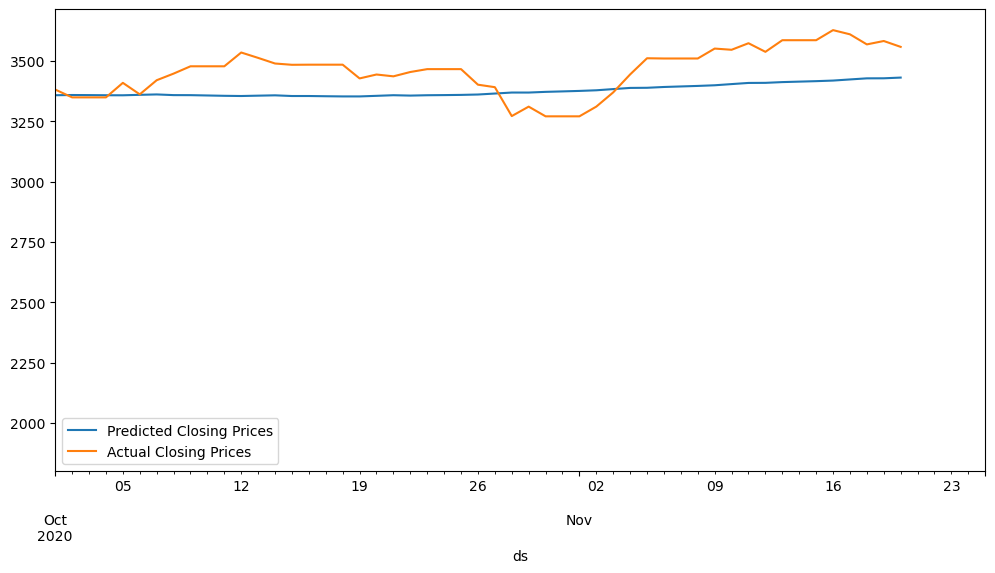

In [38]:
ax=pred_y.plot(x='ds',y='yhat',label="Predicted Closing Prices",legend=True,figsize=(12,6))
test.plot(x='ds',y='y',label="Actual Closing Prices",legend=True,ax=ax,xlim=('2020-10-01','2020-11-25'));

In [39]:
from statsmodels.tools.eval_measures import rmse

In [41]:
pred_y_vals=pred_y.iloc[-60:]['yhat']
pred_y_vals

1765    3345.993344
1766    3349.563710
1767    3348.763776
1768    3350.660198
1769    3351.385703
1770    3351.994400
1771    3353.009718
1772    3356.126490
1773    3358.973634
1774    3357.307253
1775    3358.212491
1776    3357.845039
1777    3357.285745
1778    3357.087751
1779    3358.977692
1780    3360.617426
1781    3357.796165
1782    3357.631359
1783    3356.309256
1784    3354.938633
1785    3354.097130
1786    3355.531760
1787    3356.920074
1788    3354.061868
1789    3354.079800
1790    3353.159845
1791    3352.405076
1792    3352.382215
1793    3354.822503
1794    3357.383366
1795    3355.840744
1796    3357.290426
1797    3357.889304
1798    3358.710007
1799    3360.288318
1800    3364.324924
1801    3368.447916
1802    3368.405912
1803    3371.270098
1804    3373.176088
1805    3375.179051
1806    3377.801491
1807    3382.735205
1808    3387.603871
1809    3388.156083
1810    3391.467184
1811    3393.680776
1812    3395.863379
1813    3398.551636
1814    3403.453624


In [42]:
test['y']

1765    3315.570068
1766    3236.919922
1767    3246.590088
1768    3298.459961
1769    3298.459961
1770    3298.459961
1771    3351.600098
1772    3335.469971
1773    3363.000000
1774    3380.800049
1775    3348.419922
1776    3348.419922
1777    3348.419922
1778    3408.600098
1779    3360.969971
1780    3419.439941
1781    3446.830078
1782    3477.139893
1783    3477.139893
1784    3477.139893
1785    3534.219971
1786    3511.929932
1787    3488.669922
1788    3483.340088
1789    3483.810059
1790    3483.810059
1791    3483.810059
1792    3426.919922
1793    3443.120117
1794    3435.560059
1795    3453.489990
1796    3465.389893
1797    3465.389893
1798    3465.389893
1799    3400.969971
1800    3390.679932
1801    3271.030029
1802    3310.110107
1803    3269.959961
1804    3269.959961
1805    3269.959961
1806    3310.239990
1807    3369.159912
1808    3443.439941
1809    3510.449951
1810    3509.439941
1811    3509.439941
1812    3509.439941
1813    3550.500000
1814    3545.530029


In [43]:
rmse(pred_y_vals,test['y'])

109.61800887862698

In [45]:
test.mean()

ds    2020-10-21 12:00:00
y             3435.196147
dtype: object

## Prophet Diagnostics

In [46]:
from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

In [57]:
#INITAL Period of training
initial=3*365
initial=str(initial)+' days'


In [58]:
# Periods of fold
period=3*365
period=str(period)+' days'

In [59]:
# Horizon: Days into the future to be forecast
horizon=365
horizon=str(horizon)+' days'

In [60]:
df_cv=cross_validation(pred_model,initial=initial,period=period,horizon=horizon)

  0%|          | 0/1 [00:00<?, ?it/s]21:30:30 - cmdstanpy - INFO - Chain [1] start processing
21:30:31 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


In [61]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-09-23,2978.680721,2926.218083,3030.427912,2991.780029,2019-09-22
1,2019-09-24,2981.492717,2930.322273,3033.348900,2966.600098,2019-09-22
2,2019-09-25,2983.796426,2931.097376,3034.557567,2984.870117,2019-09-22
3,2019-09-26,2984.358585,2933.093373,3033.360154,2977.620117,2019-09-22
4,2019-09-27,2985.509951,2933.637282,3036.627462,2961.790039,2019-09-22


In [62]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
360,2020-09-17,3409.279153,2420.249677,4461.493409,3357.010010,2019-09-22
361,2020-09-18,3411.289739,2408.761323,4486.990065,3319.469971,2019-09-22
362,2020-09-19,3412.364681,2396.030356,4470.160105,3319.469971,2019-09-22
363,2020-09-20,3413.430330,2420.483689,4482.765470,3319.469971,2019-09-22
364,2020-09-21,3414.016798,2397.747354,4481.771215,3281.060059,2019-09-22


In [63]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,2380.992469,48.795414,40.294152,0.013554,0.012047,0.013579,0.694444
1,37 days,2608.581551,51.074275,42.470818,0.014269,0.012595,0.014306,0.666667
2,38 days,2874.852840,53.617654,44.808054,0.015033,0.012756,0.015085,0.638889
3,39 days,3094.108401,55.624710,47.246289,0.015835,0.013018,0.015899,0.611111
4,40 days,3468.086939,58.890466,50.287628,0.016825,0.014060,0.016910,0.583333
...,...,...,...,...,...,...,...,...
325,361 days,4749.307929,68.915223,50.582687,0.014630,0.009861,0.014772,1.000000
326,362 days,4983.497374,70.593890,53.127032,0.015396,0.012724,0.015529,1.000000
327,363 days,5223.202691,72.271728,55.702182,0.016172,0.015554,0.016294,1.000000
328,364 days,5468.429092,73.948828,58.294653,0.016953,0.016695,0.017064,1.000000


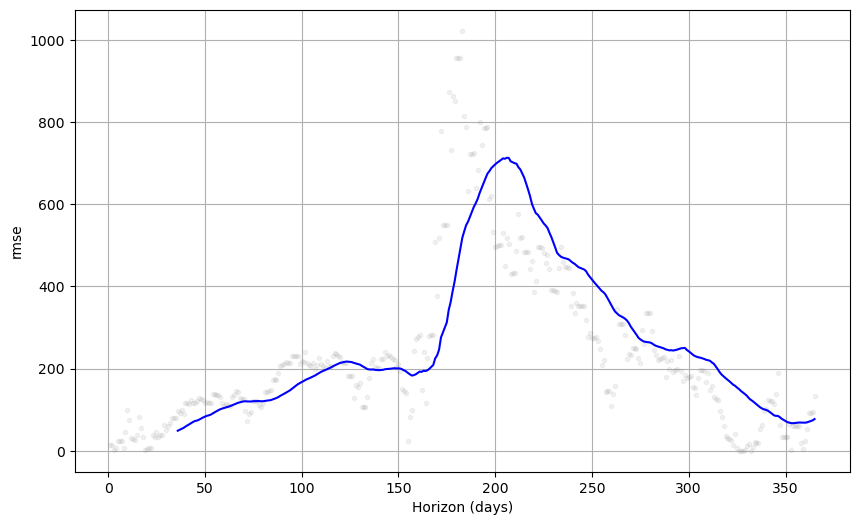

In [67]:
plot_cross_validation_metric(df_cv,metric='rmse');

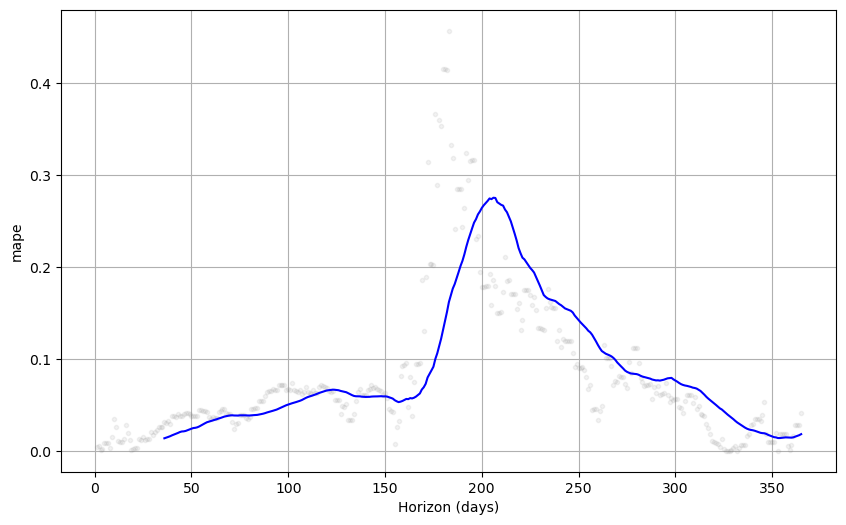

In [66]:
plot_cross_validation_metric(df_cv,metric='mape');

## Forecasting

### Create future placeholder dataframe

In [68]:
m=Prophet()
m.fit(df_close)

21:32:48 - cmdstanpy - INFO - Chain [1] start processing
21:32:48 - cmdstanpy - INFO - Chain [1] done processing


In [69]:
future=m.make_future_dataframe(periods=365,freq='D')

In [70]:
df_close.tail()

,ds,y
1820,2020-11-16,3626.909912
1821,2020-11-17,3609.530029
1822,2020-11-18,3567.790039
1823,2020-11-19,3581.870117
1824,2020-11-20,3557.540039


In [71]:
future.tail()

,ds
2185,2021-11-16
2186,2021-11-17
2187,2021-11-18
2188,2021-11-19
2189,2021-11-20


In [72]:
len(df_close)

1825

In [73]:
len(future)

2190

### Predict and fill in the future

In [74]:
forecast=m.predict(future)

In [75]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-11-23,1849.459291,1875.364297,2113.174374,1849.459291,1849.459291,145.569891,145.569891,145.569891,-1.108755,-1.108755,-1.108755,146.678646,146.678646,146.678646,0.0,0.0,0.0,1995.029182
1,2015-11-24,1851.356841,1878.404771,2119.010066,1851.356841,1851.356841,147.502932,147.502932,147.502932,0.494758,0.494758,0.494758,147.008175,147.008175,147.008175,0.0,0.0,0.0,1998.859773
2,2015-11-25,1853.254391,1883.135877,2130.245945,1853.254391,1853.254391,149.024642,149.024642,149.024642,1.934395,1.934395,1.934395,147.090246,147.090246,147.090246,0.0,0.0,0.0,2002.279032
3,2015-11-26,1855.151941,1900.609479,2127.578075,1855.151941,1855.151941,147.048048,147.048048,147.048048,0.114726,0.114726,0.114726,146.933322,146.933322,146.933322,0.0,0.0,0.0,2002.199989
4,2015-11-27,1857.049491,1880.396589,2119.771901,1857.049491,1857.049491,147.069654,147.069654,147.069654,0.523052,0.523052,0.523052,146.546602,146.546602,146.546602,0.0,0.0,0.0,2004.119145


In [76]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2185,2021-11-16,3706.811445,2705.998907,4944.711645,2552.881656,4787.758204,138.698314,138.698314,138.698314,0.494758,0.494758,0.494758,138.203556,138.203556,138.203556,0.0,0.0,0.0,3845.509759
2186,2021-11-17,3707.824779,2744.063301,4939.973724,2546.479519,4799.652063,142.154085,142.154085,142.154085,1.934395,1.934395,1.934395,140.219689,140.219689,140.219689,0.0,0.0,0.0,3849.978864
2187,2021-11-18,3708.838114,2732.388619,4939.324332,2542.023824,4811.545921,142.098510,142.098510,142.098510,0.114726,0.114726,0.114726,141.983783,141.983783,141.983783,0.0,0.0,0.0,3850.936624
2188,2021-11-19,3709.851449,2706.279018,4936.833042,2537.671165,4823.439780,144.011204,144.011204,144.011204,0.523052,0.523052,0.523052,143.488153,143.488153,143.488153,0.0,0.0,0.0,3853.862653
2189,2021-11-20,3710.864783,2722.991131,4955.178597,2533.730698,4828.431017,144.160896,144.160896,144.160896,-0.567878,-0.567878,-0.567878,144.728774,144.728774,144.728774,0.0,0.0,0.0,3855.025680


In [77]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [78]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(60)

,ds,yhat,yhat_lower,yhat_upper
2130,2021-09-22,3735.600877,2900.273801,4581.193736
2131,2021-09-23,3735.978554,2852.177484,4594.043098
2132,2021-09-24,3738.780683,2860.360421,4592.835831
2133,2021-09-25,3740.246374,2864.735318,4606.910236
2134,2021-09-26,3742.104758,2882.296396,4607.253897
2135,2021-09-27,3745.148842,2888.276168,4628.600348
2136,2021-09-28,3749.551641,2888.770619,4633.679632
2137,2021-09-29,3753.781108,2874.779219,4632.595099
2138,2021-09-30,3754.695752,2853.359177,4654.462177
2139,2021-10-01,3757.738289,2881.033205,4663.531725


### Plotting forecast

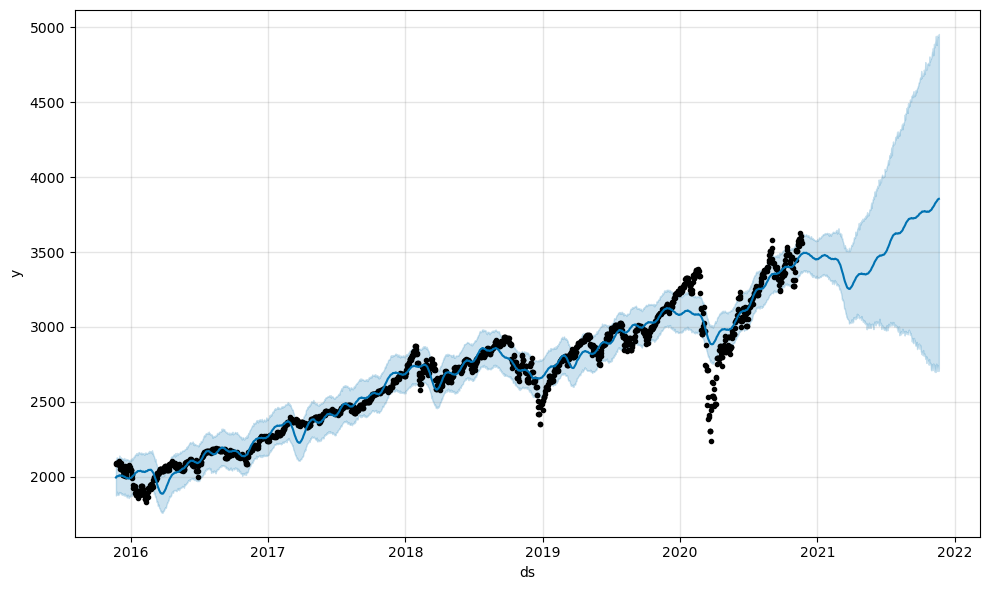

In [79]:
m.plot(forecast);

# Trend Changes

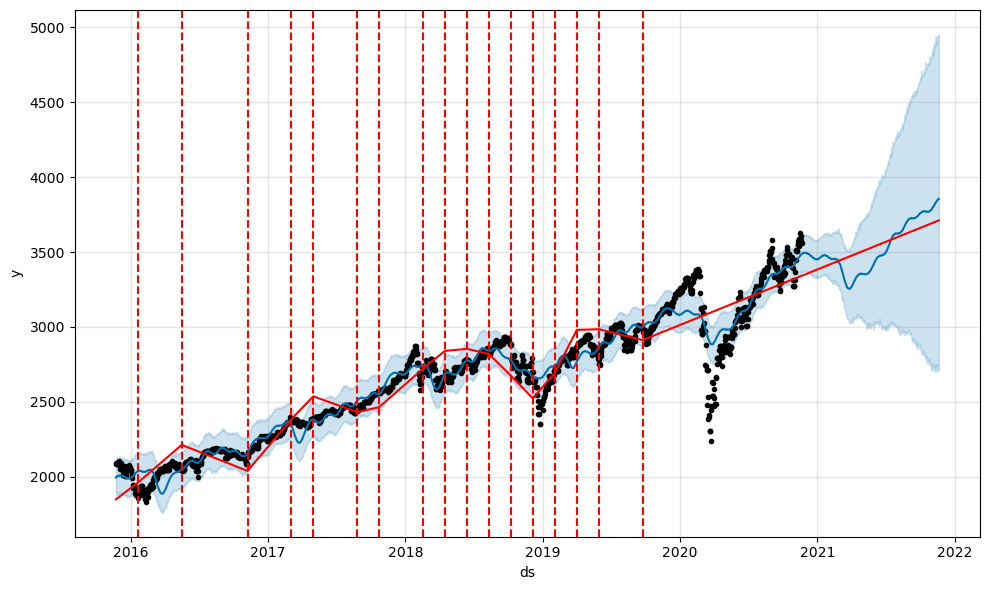

In [81]:
from prophet.plot import add_changepoints_to_plot
fig=m.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),m,forecast)


21:42:13 - cmdstanpy - INFO - Chain [1] start processing
21:42:13 - cmdstanpy - INFO - Chain [1] done processing


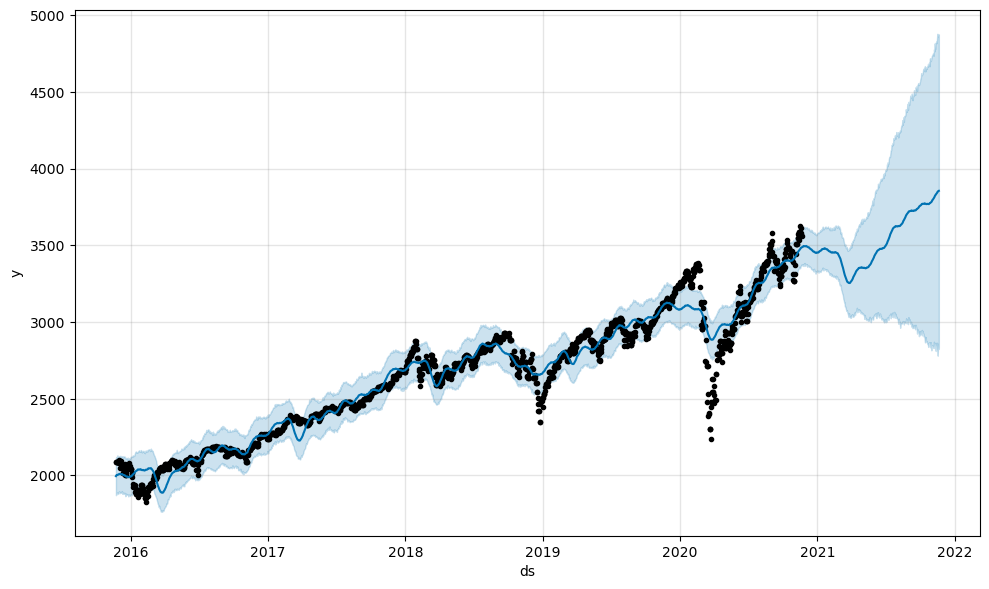

In [82]:
m=Prophet(seasonality_mode="additive")
m.fit(df_close)
forecast=m.predict(future)
fig=m.plot(forecast)

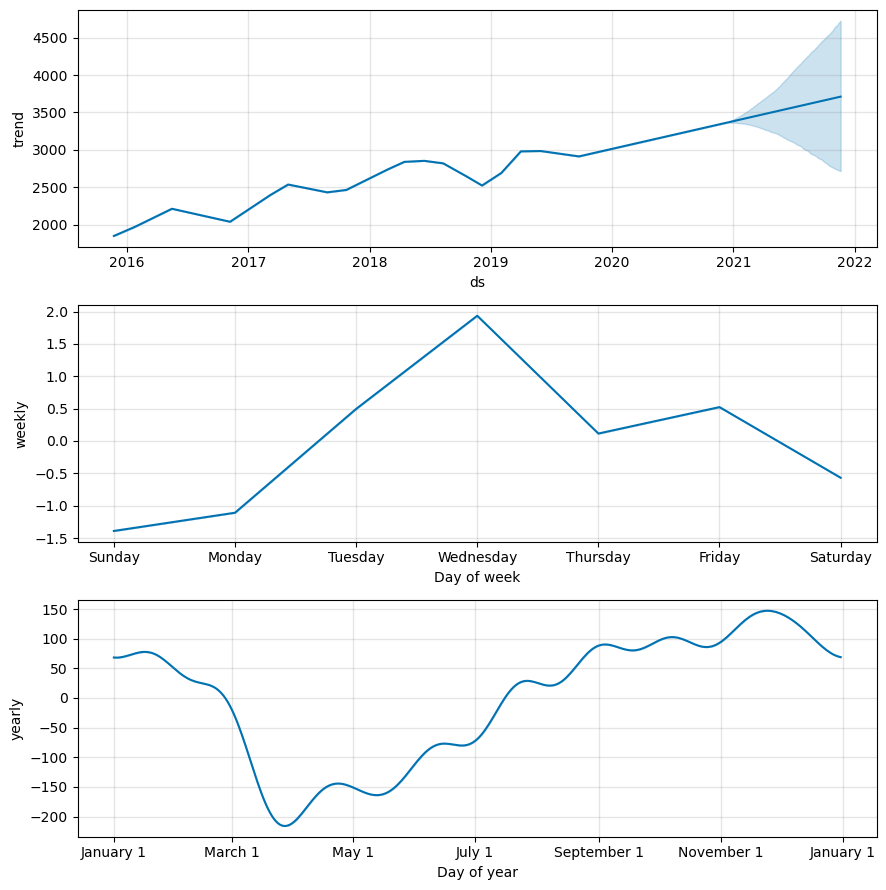

In [83]:
fig=m.plot_components(forecast)

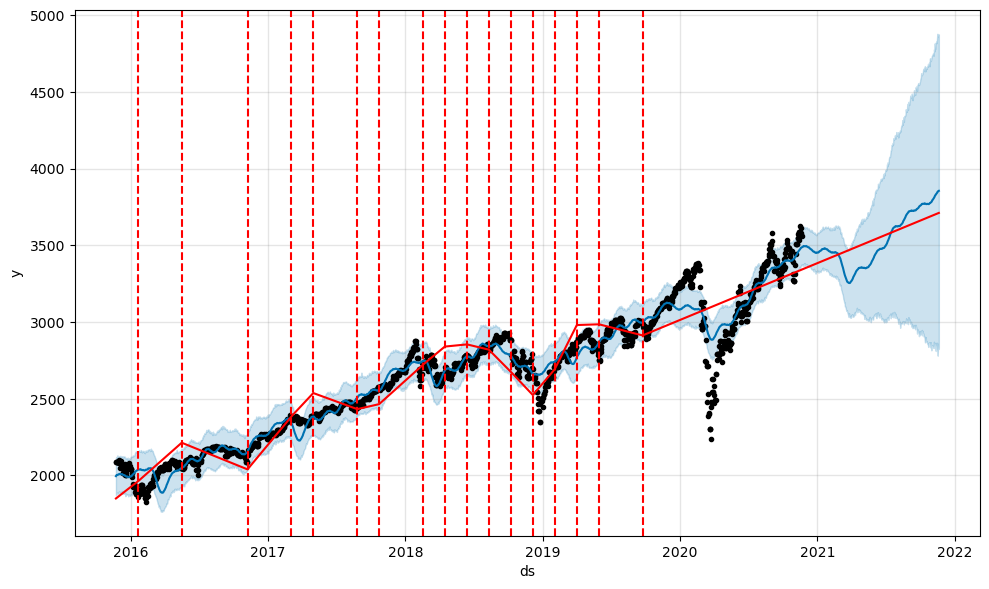

In [84]:
fig=m.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),m,forecast)

21:44:28 - cmdstanpy - INFO - Chain [1] start processing
21:44:28 - cmdstanpy - INFO - Chain [1] done processing


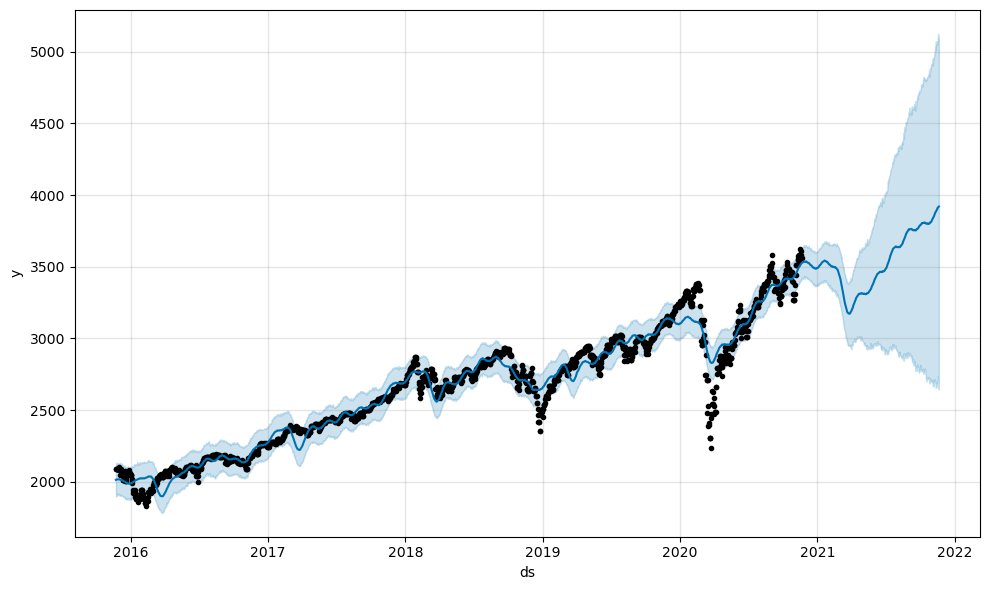

In [85]:
m=Prophet(seasonality_mode="multiplicative")
m.fit(df_close)
forecast=m.predict(future)
fig=m.plot(forecast)

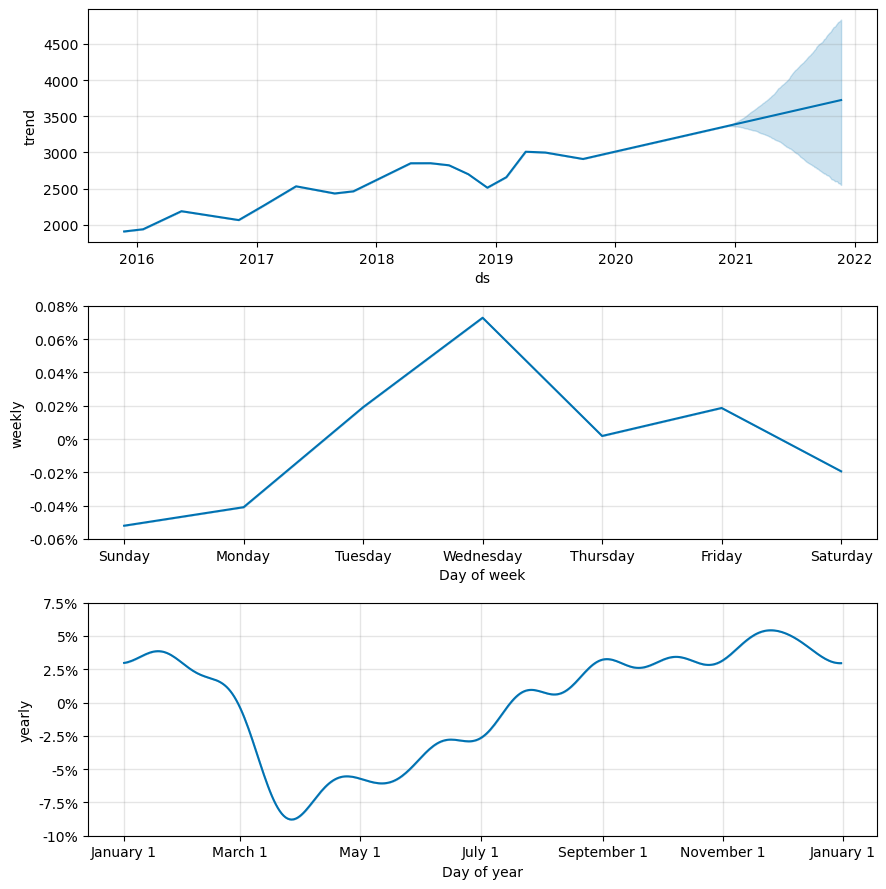

In [86]:
fig=m.plot_components(forecast)

In [ ]:
fig=m.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),m,forecast)